In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# import data from CSV
data = pd.read_csv("Output_ZPrimeBoostedAnalysis/data.csv", delimiter=" ")
ttbar_lep = pd.read_csv("Output_ZPrimeBoostedAnalysis/ttbar_lep.csv", delimiter=" ")
ZPrime1000 = pd.read_csv("Output_ZPrimeBoostedAnalysis/ZPrime1000_tt.csv", delimiter=" ")


In [13]:
data

,etmiss,mtw,leadleptPt,leadleptEta,leadleptE,leadleptPhi,Q_leadlep,leadleptID,n_TopLRjets,leadTopLRjet_pt,...,n_bjets,leadbjet_pt,leadbjet_eta,ttbarMLR,largeRjet_pt_total,largeRjet_eta_total,largeRjet_phi_total,largeRjet_m_total,largeRjet_tau32_total,weight
0,140.8590,112.6010,173.3020,-0.719597,220.1410,-0.629445,1,11,1,303.808,...,2,74.2067,1.155760,0.000,303.808,0.716499,2.340630,105.440,0.701667,1
1,101.1240,12.9607,84.2450,0.521832,95.9780,1.694020,1,13,1,319.519,...,1,229.1180,-0.005455,0.000,319.519,-0.207688,-1.050650,124.417,0.658574,1
2,93.8502,145.9590,69.5917,-0.571767,81.2804,2.401100,1,11,1,379.502,...,1,354.8290,0.387903,0.000,379.502,0.429905,-0.032258,101.729,0.705147,1
3,79.1584,78.5076,39.4455,0.320825,41.4930,1.189650,-1,11,1,364.358,...,2,111.3740,-1.131620,0.000,673.232,-0.882717,2.047210,211.584,1.222030,1
4,49.9677,119.0770,78.1793,-1.261530,149.0890,-0.060379,1,11,1,381.640,...,4,327.3410,-0.637407,836.840,749.172,-1.939400,-0.584009,245.185,1.182330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13983,51.2650,36.3069,32.4356,-1.826030,103.3120,2.875370,1,11,1,313.153,...,1,63.3124,-2.219060,0.000,313.153,-1.469270,-0.309966,149.170,0.428863,1
13984,177.2230,98.1917,226.8500,0.625051,272.6260,2.951550,-1,13,1,403.237,...,1,79.7143,0.725713,858.712,403.237,-0.551284,-0.521822,163.453,0.696539,1
13985,379.7260,76.7778,38.0448,0.559037,44.1463,-2.853520,1,13,1,618.111,...,2,120.5620,2.143520,0.000,883.045,1.610580,-3.028970,283.641,1.011700,1
13986,76.5990,32.0798,68.3700,-0.439462,75.0790,-0.758893,1,11,1,336.483,...,1,173.8460,1.078890,0.000,336.483,1.348570,1.986230,103.251,0.382302,1


In [21]:
data.columns

Index(['etmiss', 'mtw', 'leadleptPt', 'leadleptEta', 'leadleptE',
       'leadleptPhi', 'Q_leadlep', 'leadleptID', 'n_TopLRjets',
       'leadTopLRjet_pt', 'leadTopLRjet_eta', 'leadTopLRjet_phi',
       'leadTopLRjet_m', 'leadTopLRjet_Tau32', 'n_jets', 'leadjet_pt',
       'leadjet_eta', 'n_bjets', 'leadbjet_pt', 'leadbjet_eta', 'ttbarMLR',
       'largeRjet_pt_total', 'largeRjet_eta_total', 'largeRjet_phi_total',
       'largeRjet_m_total', 'largeRjet_tau32_total', 'weight'],
      dtype='object')

In [14]:
# etmiss = MET
# mtw 
# lep_charge = Q_leadlep (leadleptch)
# lep_type = leadleptID
# lepton_1_eta = leadleptEta
# lepton_1_E = leadleptE
# lepton_1_phi = leadleptPhi
# lepton_1_pt = leadleptPt
# largeRjet_tau32 = leadTopLRjet_Tau32
# largeRjet_m = leadTopLRjet_m
# largeRjet_phi = leadTopLRjet_phi
# largeRjet_eta = leadTopLRjet_eta
# largeRjet_pt = leadTopLRjet_pt
# TopLRjet_n = n_TopLRjets

# MISSING:
"""
leadbjet_eta    +
leadbjet_pt     +
leadjet_eta     +
leadjet_pt      +

leadLRjet_eta   
leadLRjet_m     
leadLRjet_phi   
leadLRjet_pt    
leadLRjet_tau32 

n_bjets         + 
n_jets          +
n_leadLRjets    
ttbarMLR
"""

'\nleadbjet_eta    +\nleadbjet_pt     +\nleadjet_eta     +\nleadjet_pt      +\n\nleadLRjet_eta   \nleadLRjet_m     \nleadLRjet_phi   \nleadLRjet_pt    \nleadLRjet_tau32 \n\nn_bjets         + \nn_jets          +\nn_leadLRjets    \nttbarMLR\n'

In [34]:
ranges_bins = {"etmiss": [0, 400, 30], "leadbjet_eta": [-3, 3, 30], "leadbjet_pt": [0, 400, 20], 
                "leadjet_eta": [-3, 3, 30], "leadjet_pt": [0, 400, 20], 
                "Q_leadlep": [-1.5, 1.5, 7], "leadleptE": [0, 500, 30], "leadleptEta": [-3, 3, 30], 
                "leadleptID": [6, 20, 15], "leadleptPhi":[-3.2, 3.2, 32], "leadleptPt": [0, 400, 20], 
                "largeRjet_eta_total": [-3, 3, 20], "largeRjet_m_total": [50, 250, 30], "largeRjet_phi_total": [-3.2, 3.2, 12],
                "largeRjet_pt_total": [250, 700, 30], "largeRjet_tau32_total": [0, 1, 20], "leadTopLRjet_eta": [-3, 3, 20],
                "leadTopLRjet_m": [100, 250, 25], "leadTopLRjet_phi": [-3.2, 3.2, 12], 
                "leadTopLRjet_pt": [250, 700, 30],
                "leadTopLRjet_Tau32": [0, 1, 20], "mtw": [0, 250, 30], "n_bjets": [-0.5, 3.5, 4], 
                "n_jets": [-0.5, 3.5, 4], "n_TopLRjets": [-0.5, 3.5, 4],
                "ttbarMLR": [400, 1600, 20]}
# "leadTopLRjet_syst_pt": [250, 700, 30], 
# "n_leadLRjets": [-0.5, 3.5, 4],

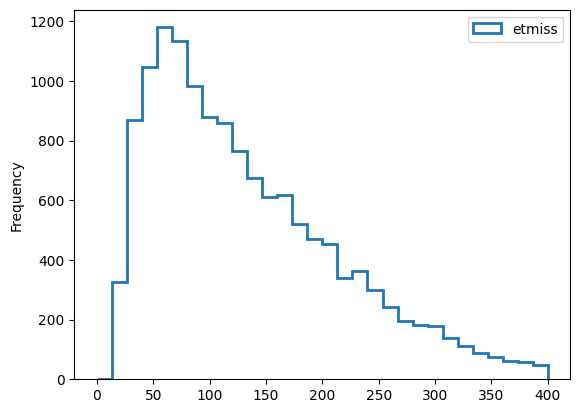

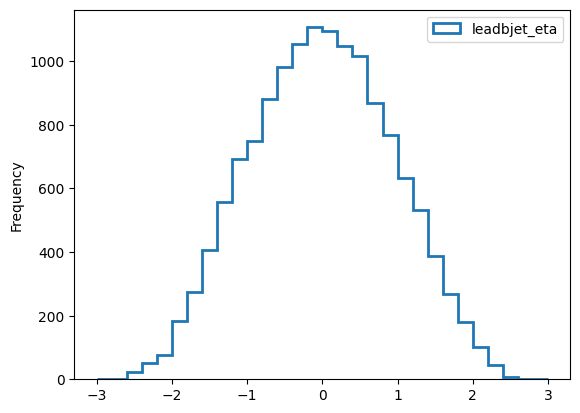

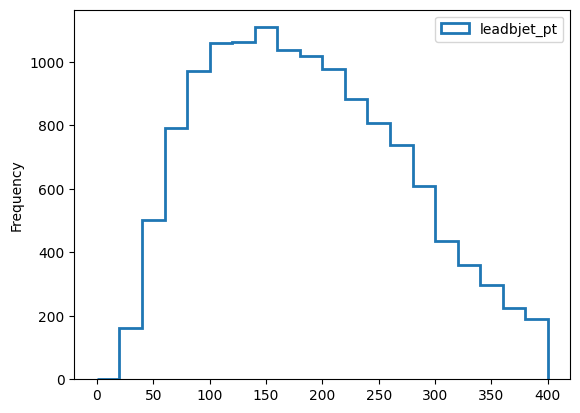

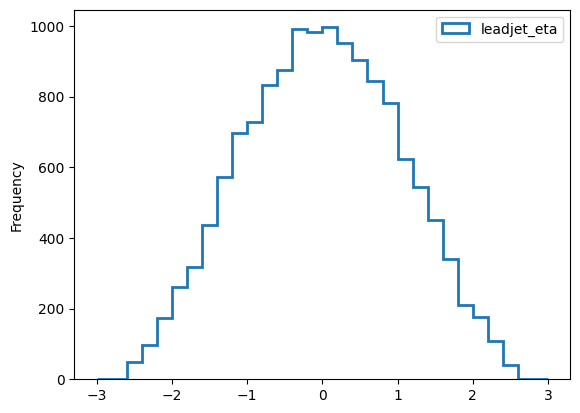

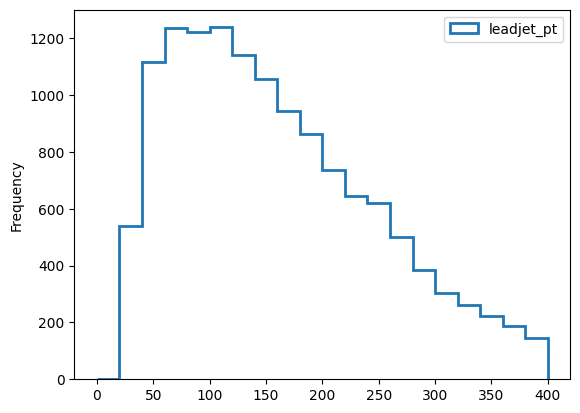

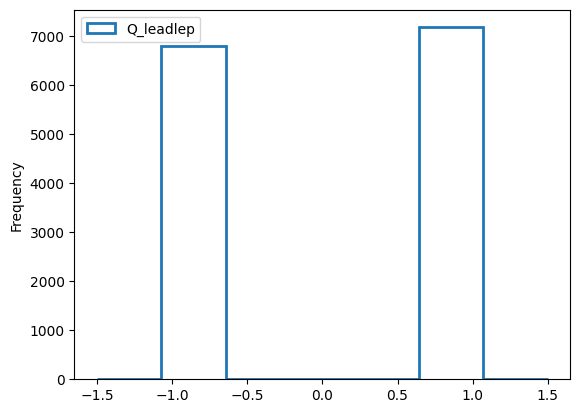

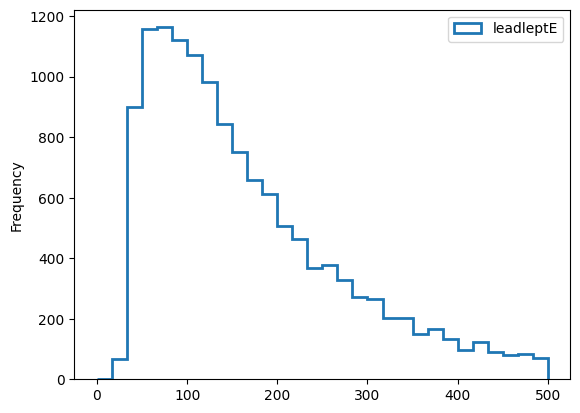

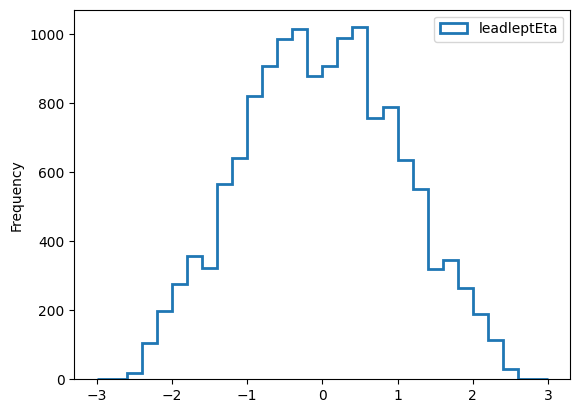

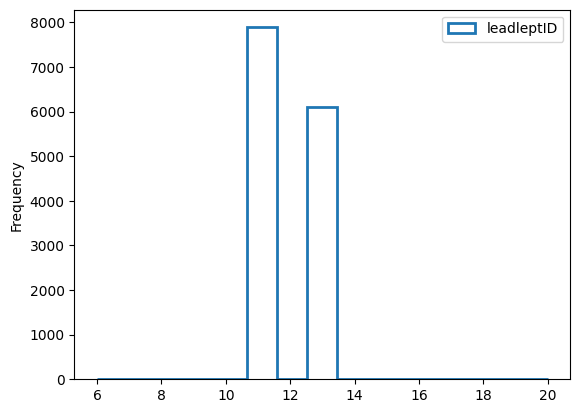

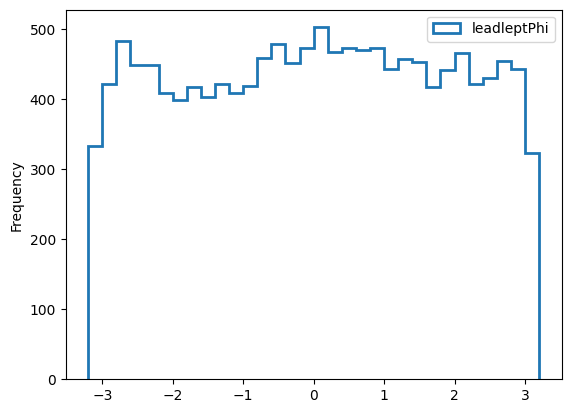

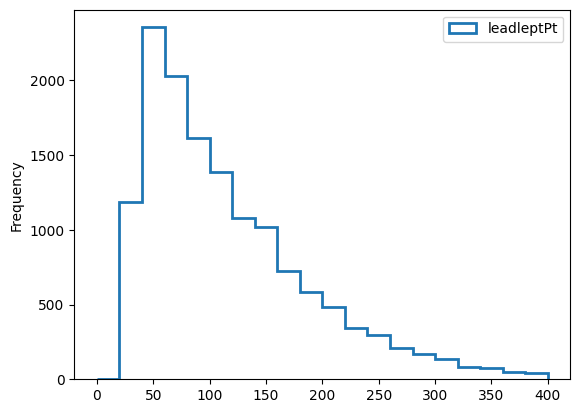

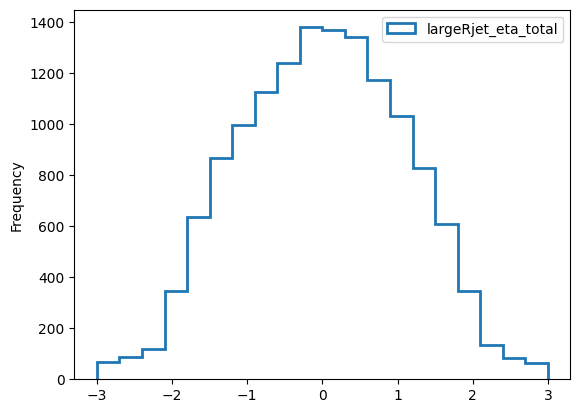

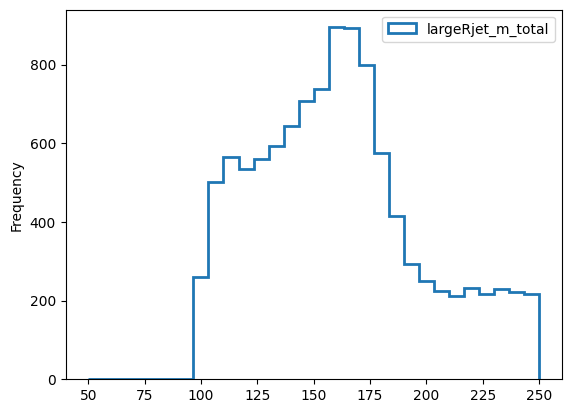

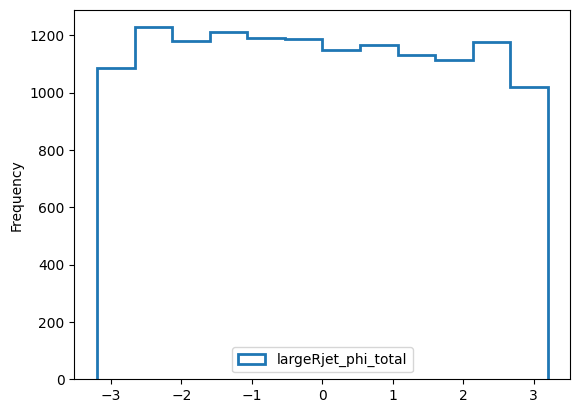

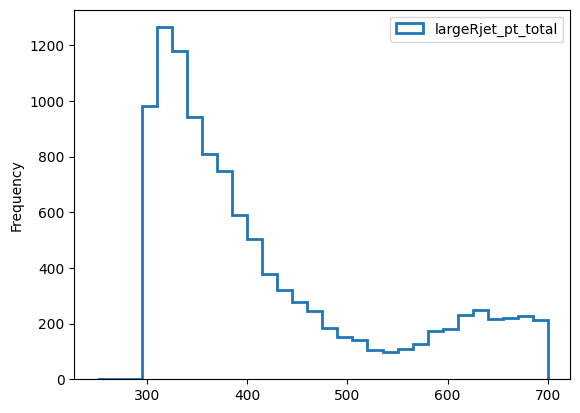

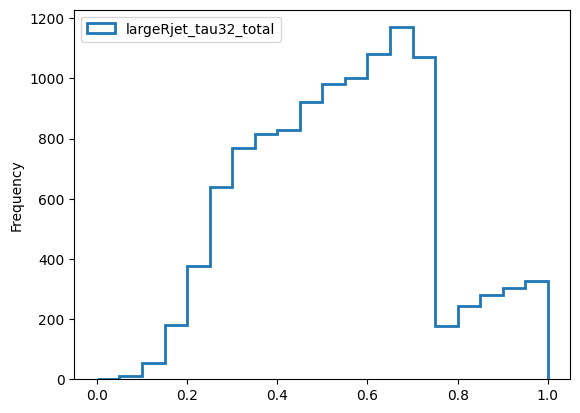

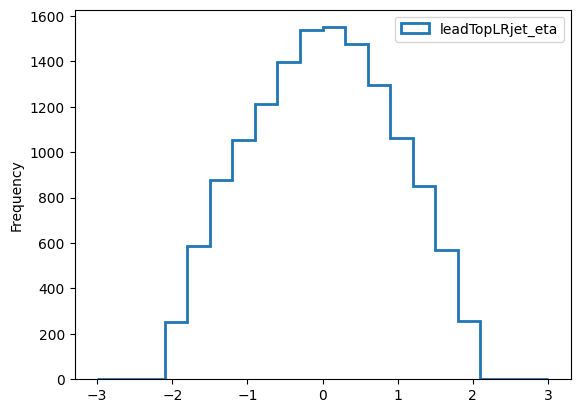

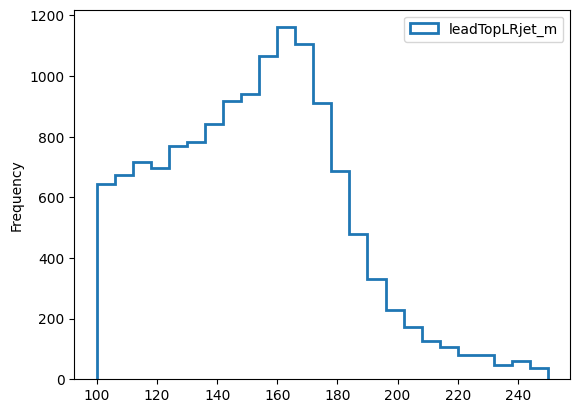

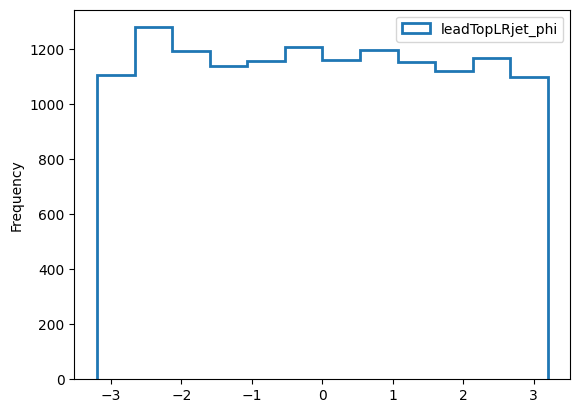

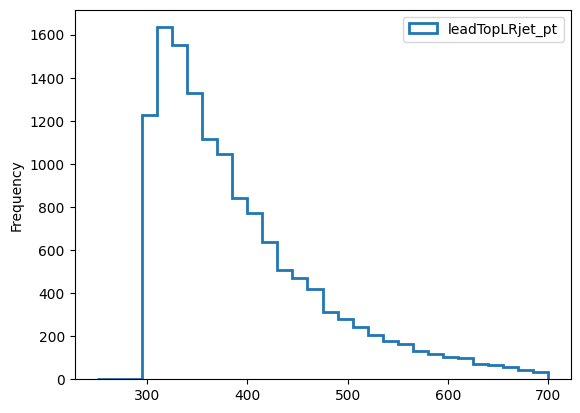

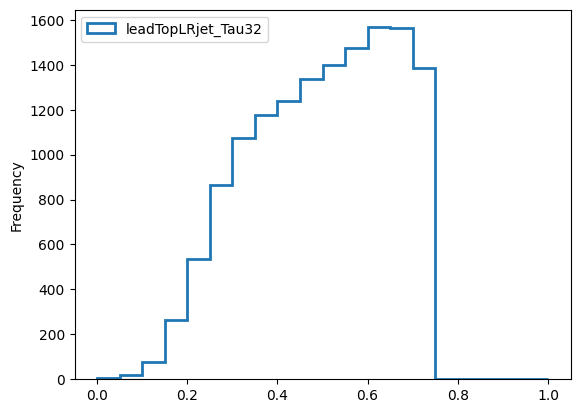

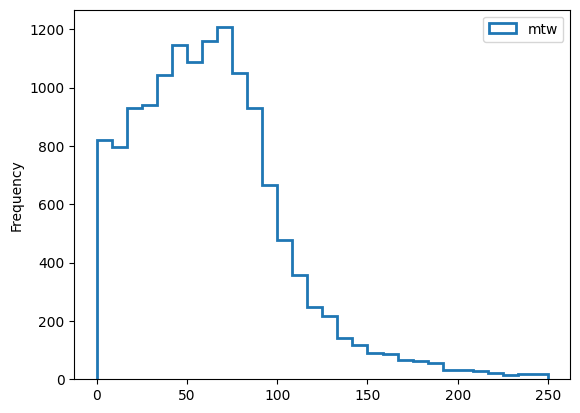

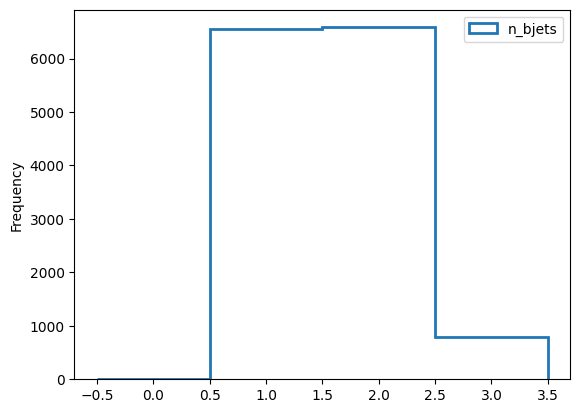

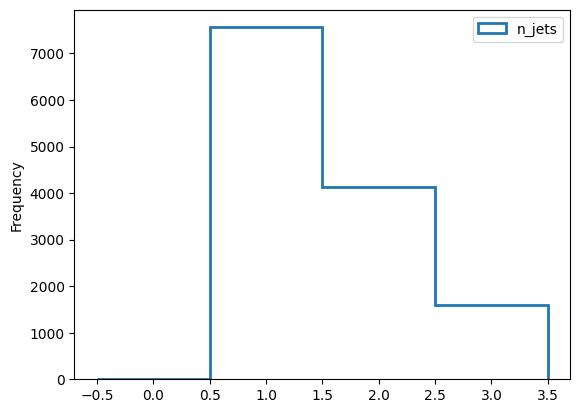

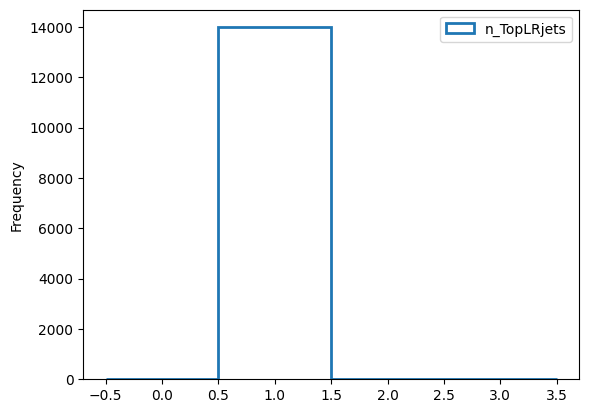

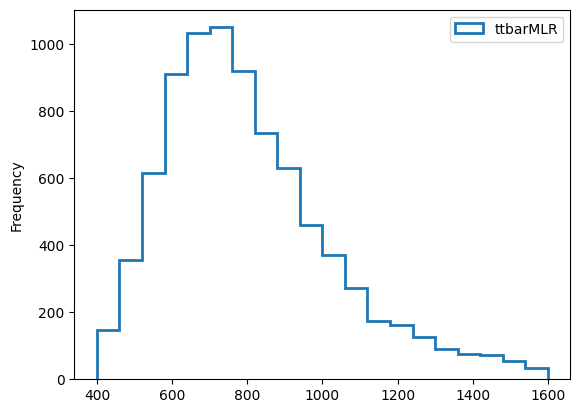

In [35]:
# plot histograms
for key in ranges_bins:
    data.plot.hist(y=key, bins=np.linspace(ranges_bins[key][0], ranges_bins[key][1], ranges_bins[key][2]+1), histtype="step", linewidth=2)
    # ttbar_lep.plot.hist(y=key, bins=np.linspace(ranges_bins[key][0], ranges_bins[key][1], ranges_bins[key][2]), histtype="step", linewidth=2)
    # ZPrime1000.plot.hist(y=key, bins=np.linspace(ranges_bins[key][0], ranges_bins[key][1], ranges_bins[key][2]), histtype="step", linewidth=2)
    plt.show()

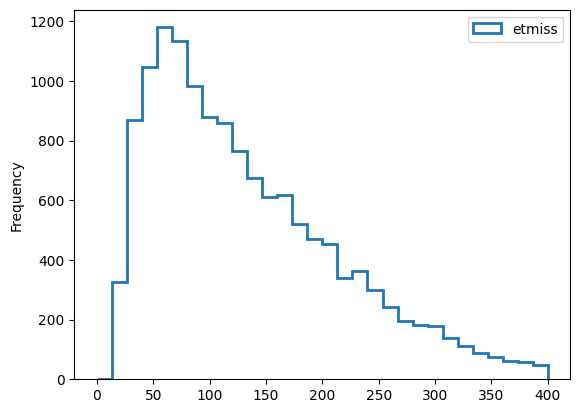

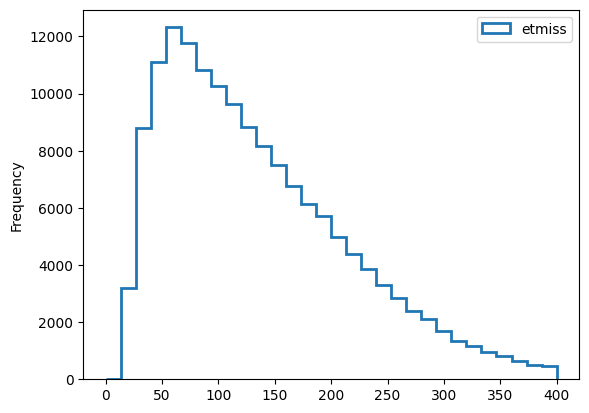

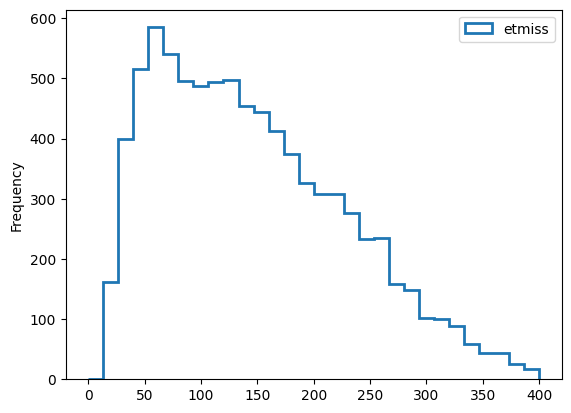

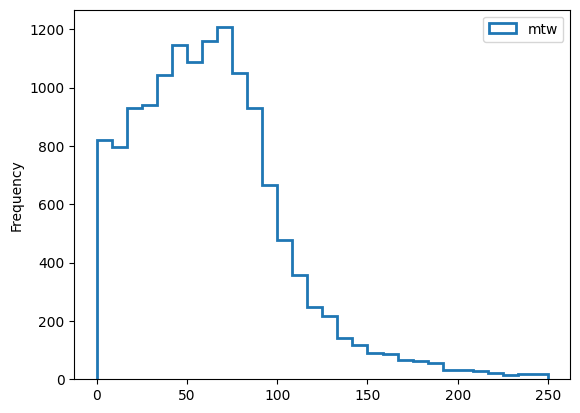

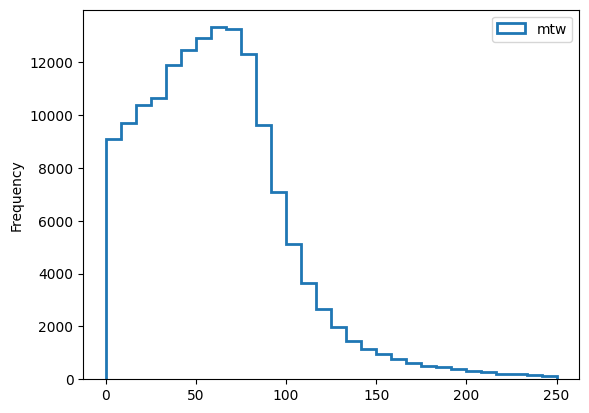

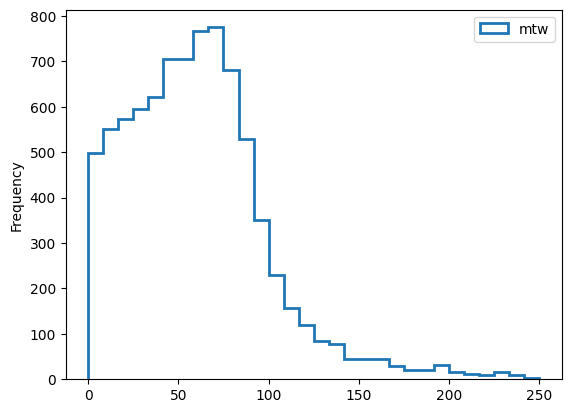

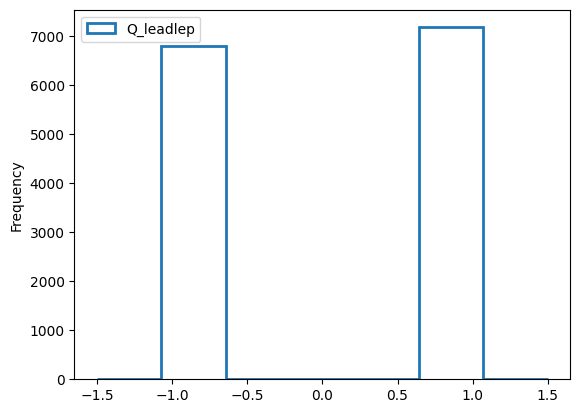

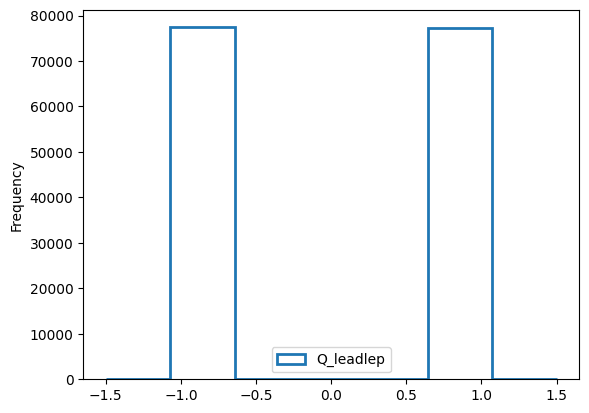

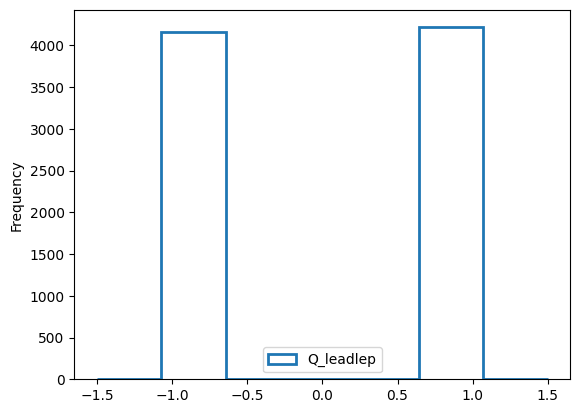

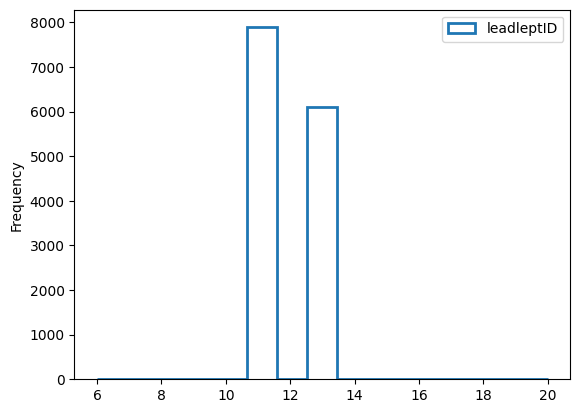

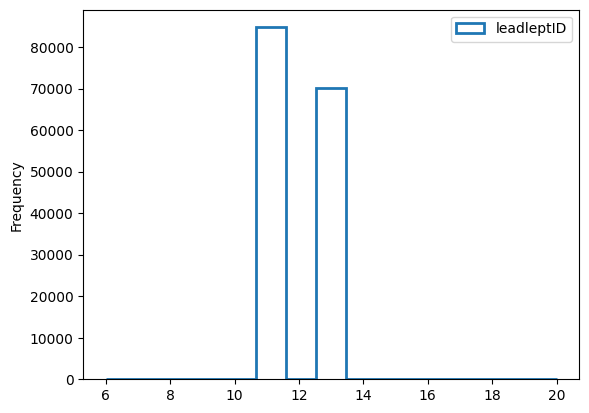

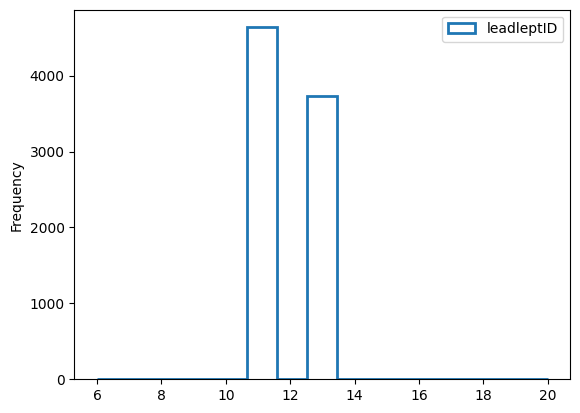

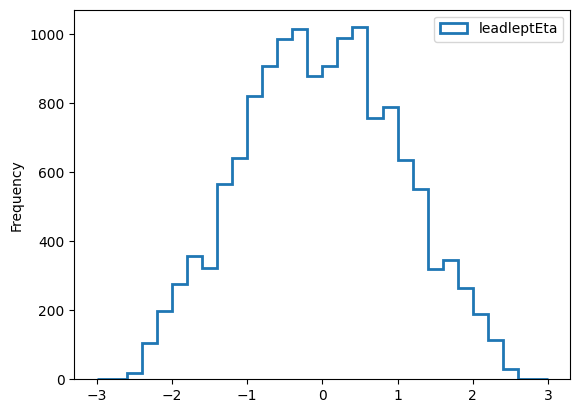

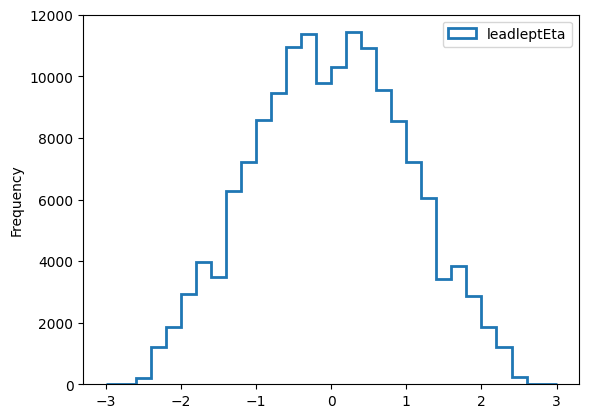

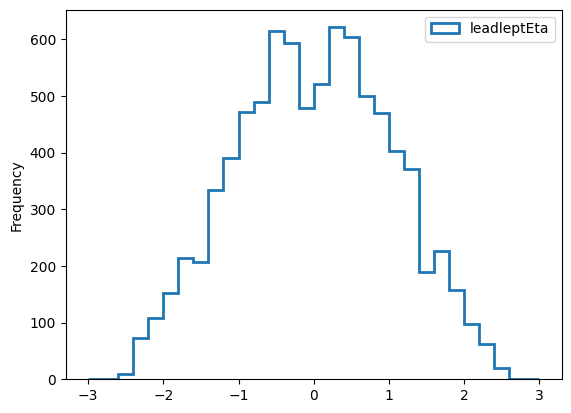

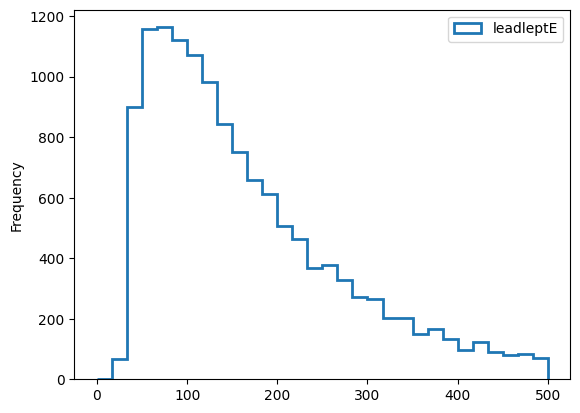

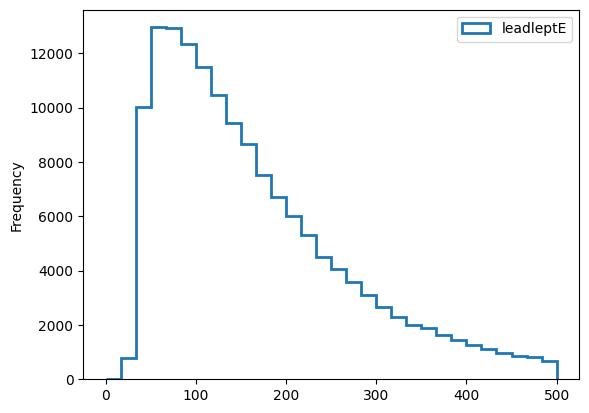

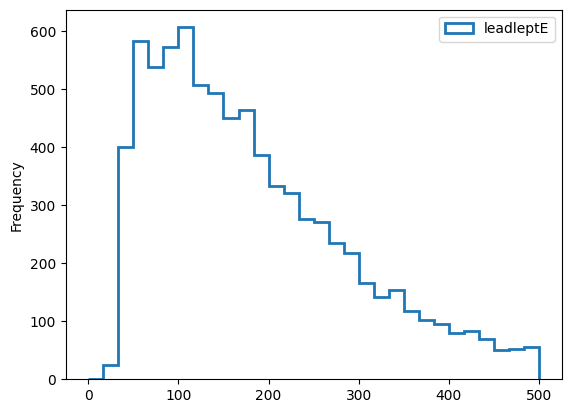

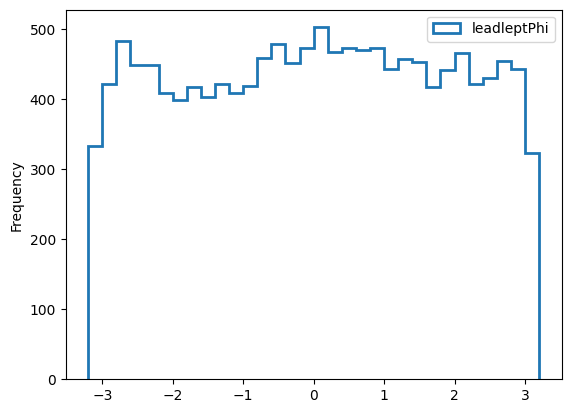

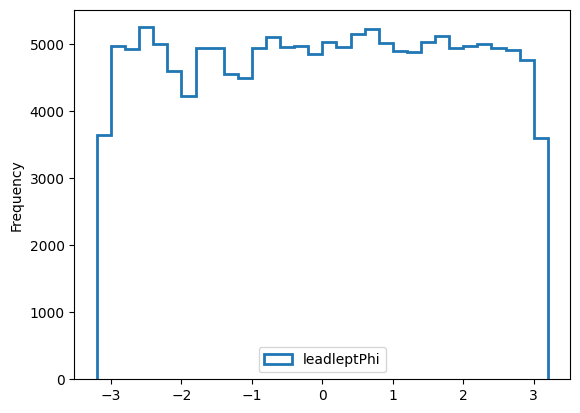

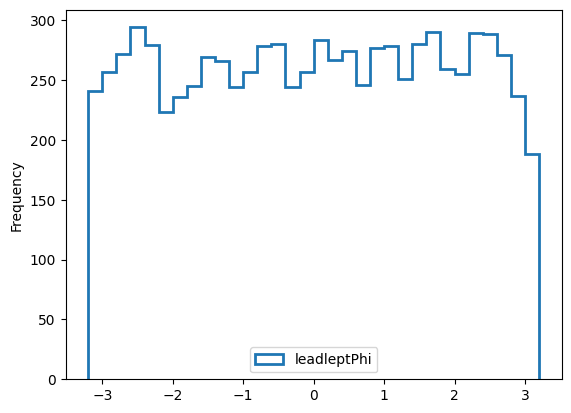

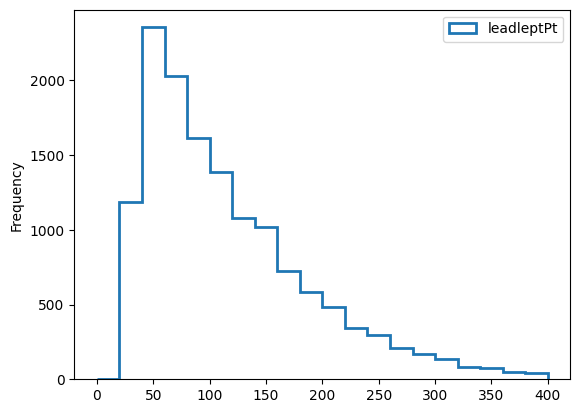

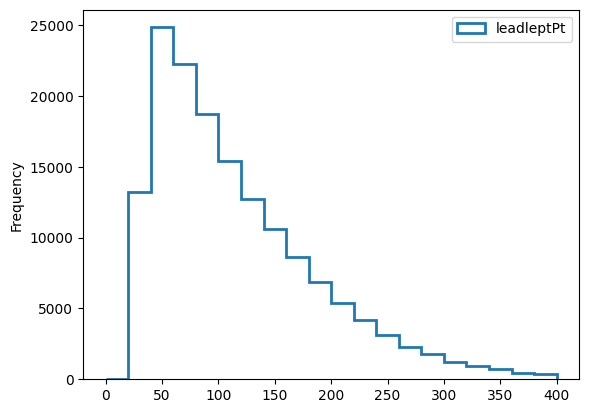

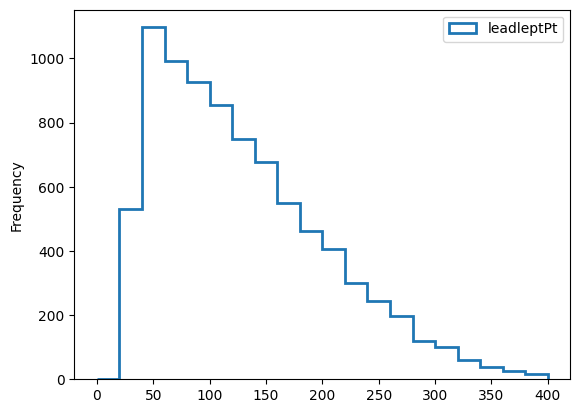

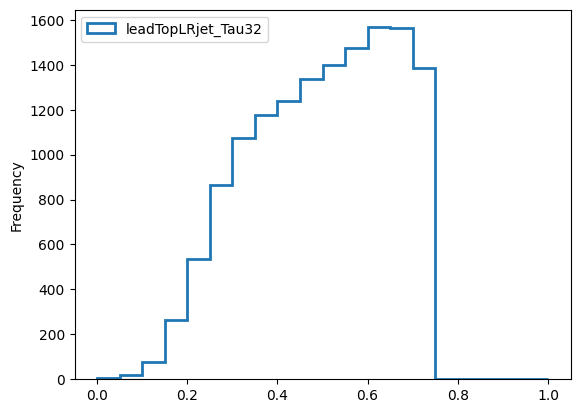

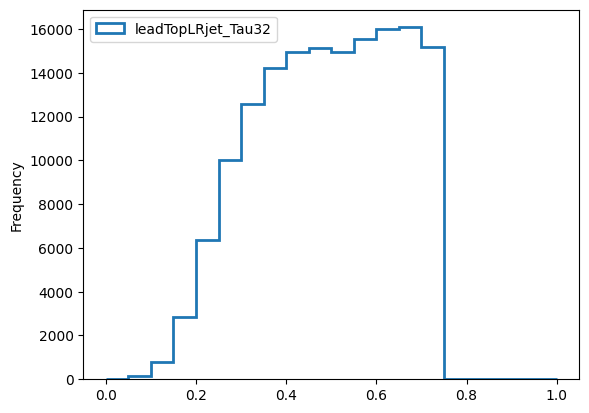

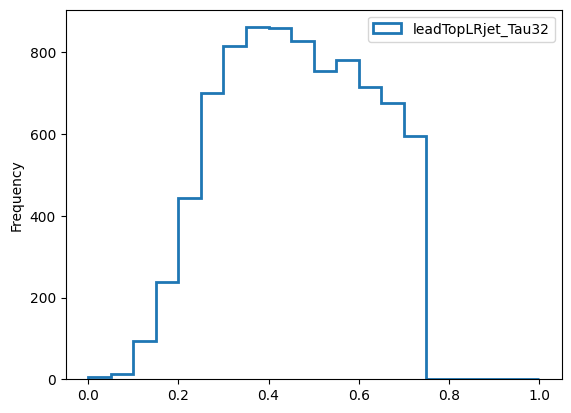

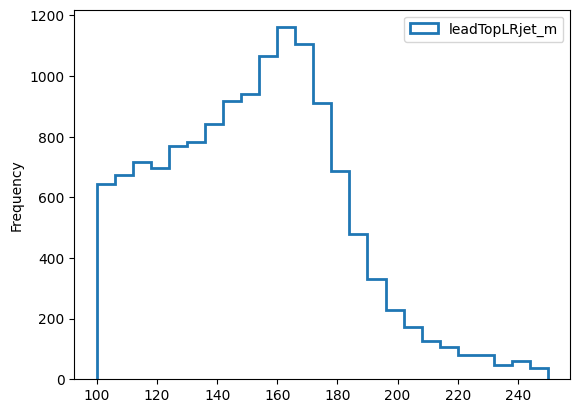

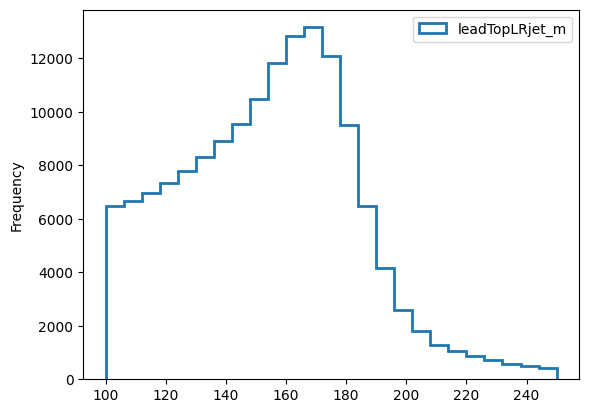

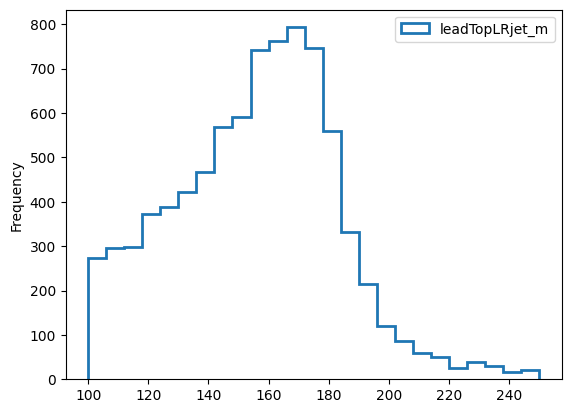

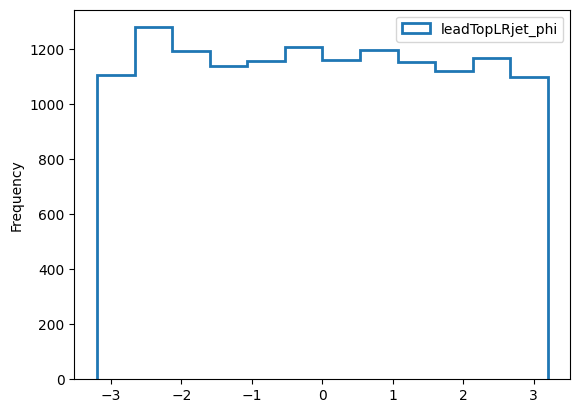

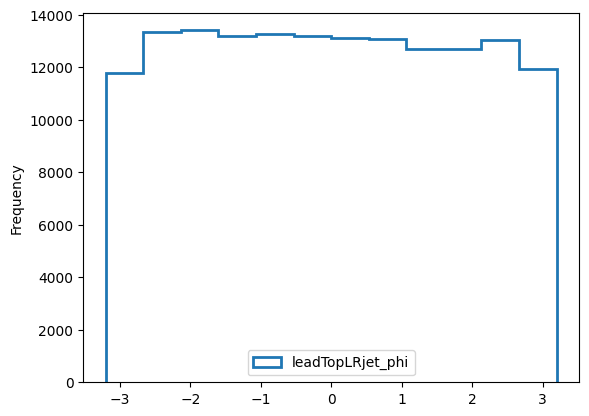

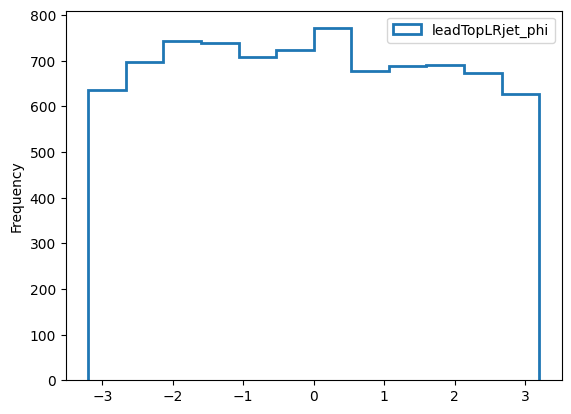

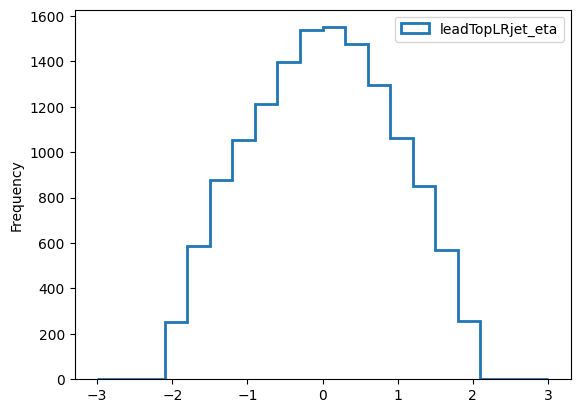

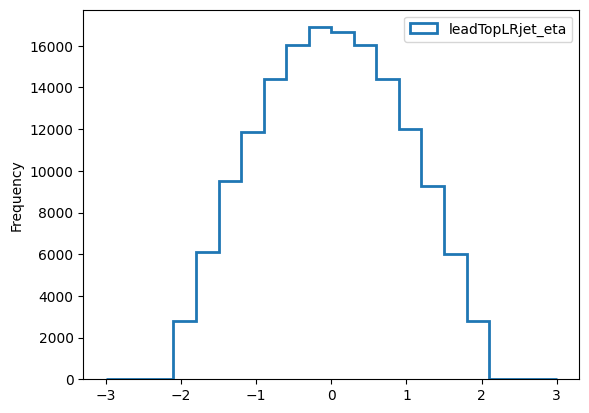

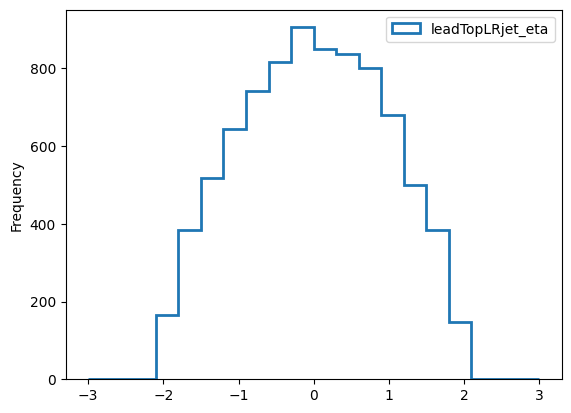

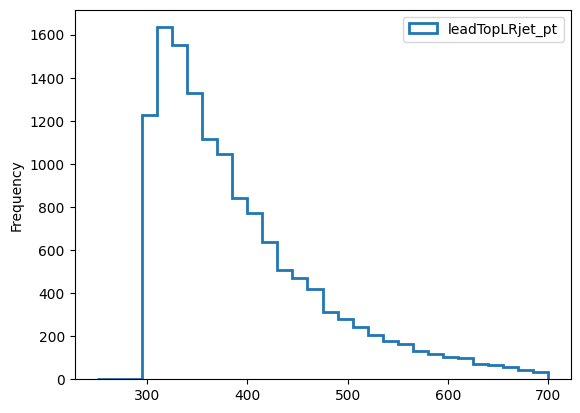

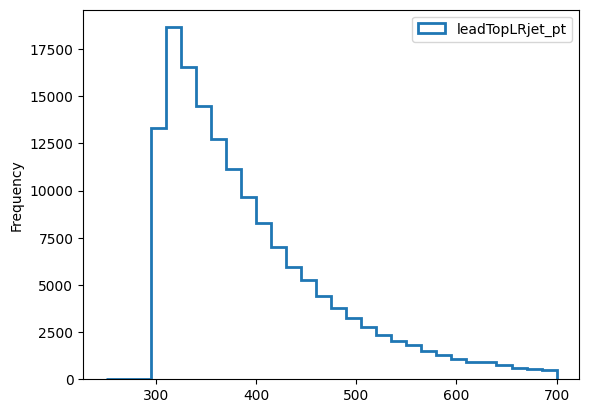

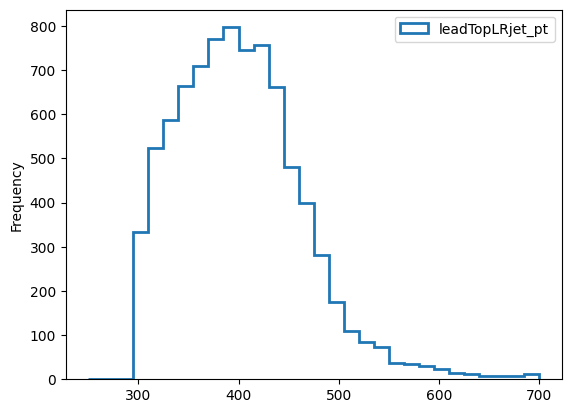

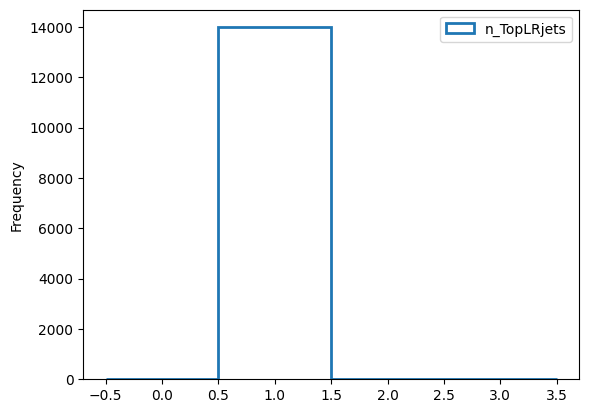

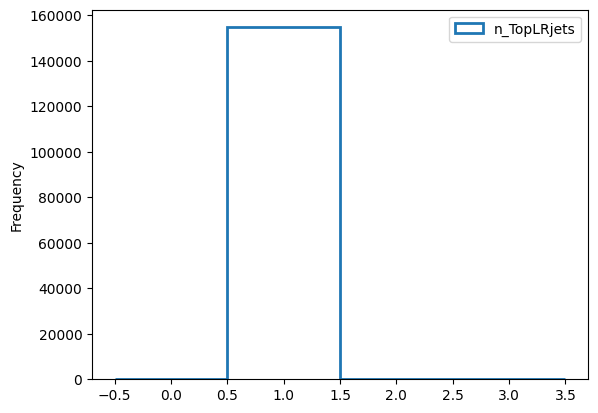

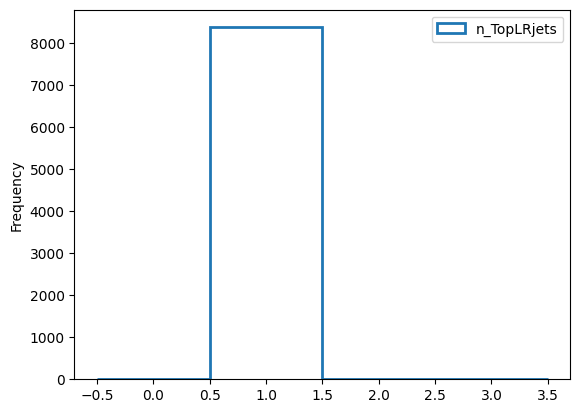

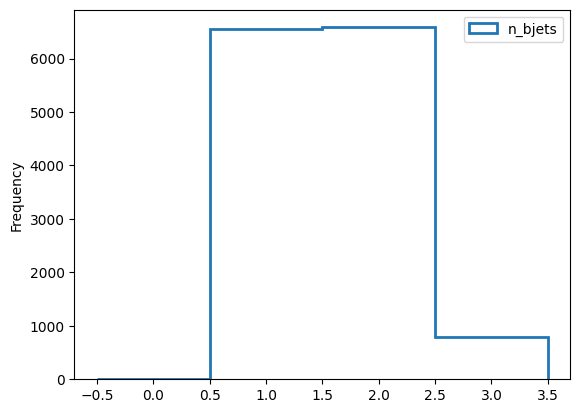

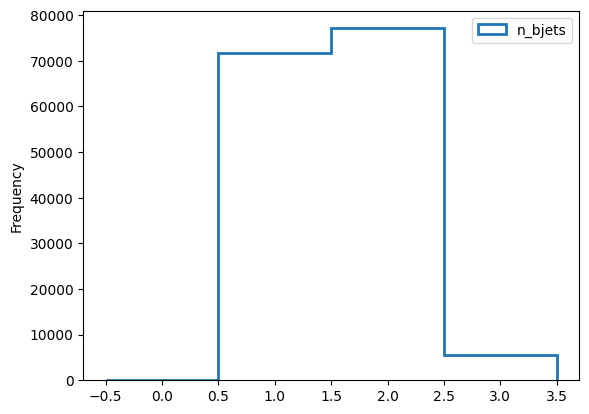

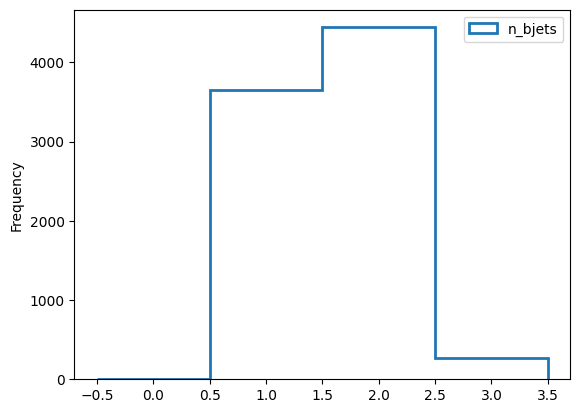

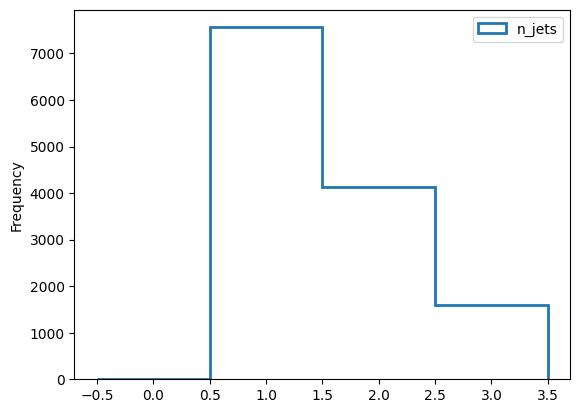

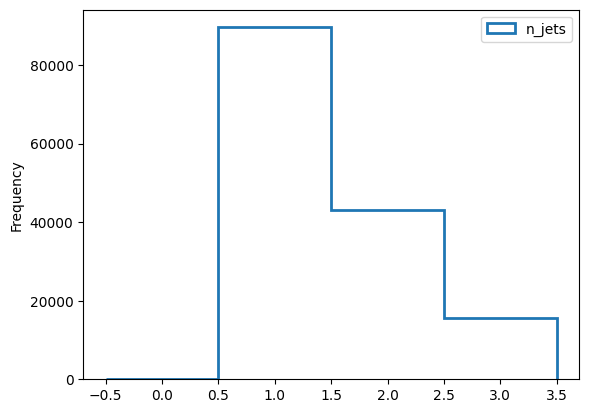

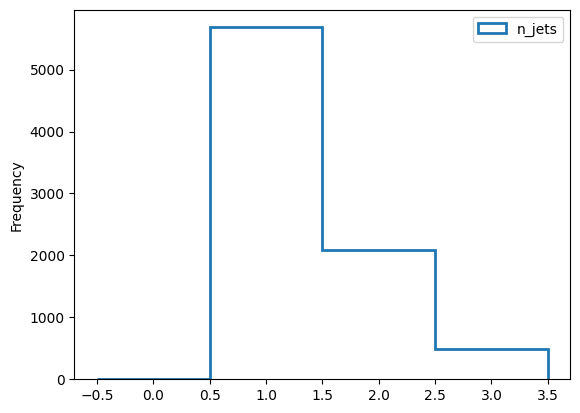

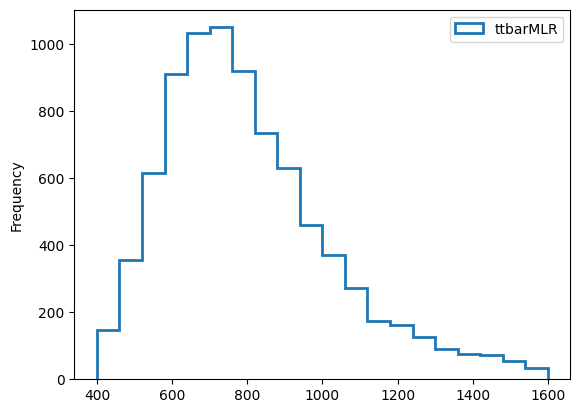

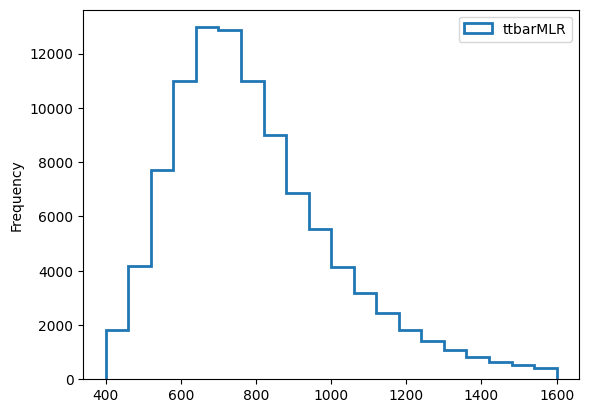

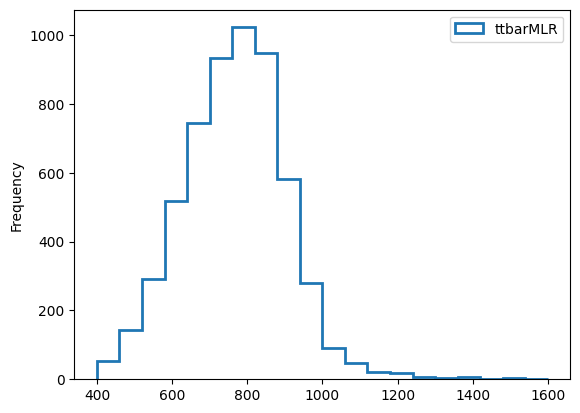

In [37]:
plot_features = ["etmiss", "mtw", "Q_leadlep", "leadleptID", "leadleptEta", "leadleptE", "leadleptPhi", "leadleptPt", "leadTopLRjet_Tau32",
                "leadTopLRjet_m", "leadTopLRjet_phi", "leadTopLRjet_eta", "leadTopLRjet_pt", "n_TopLRjets", "n_bjets", "n_jets", "ttbarMLR"]

for feature in plot_features:
    data.plot.hist(y=feature, bins=np.linspace(ranges_bins[feature][0], ranges_bins[feature][1], ranges_bins[feature][2]+1), histtype="step", linewidth=2)
    ttbar_lep.plot.hist(y=feature, bins=np.linspace(ranges_bins[feature][0], ranges_bins[feature][1], ranges_bins[feature][2]+1), histtype="step", linewidth=2)
    ZPrime1000.plot.hist(y=feature, bins=np.linspace(ranges_bins[feature][0], ranges_bins[feature][1], ranges_bins[feature][2]+1), histtype="step", linewidth=2)
    plt.show()

